In [1]:
import numpy as np
from profile_likelihood import profile_likelihood
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 1000
I0 = 10
R0 = 0
S0 = 990
beta = 0.001
alpha = 0.03

# S0 = N - I0 - E0 - R0
init_cond = S0, I0, R0 # Initial conditions
Fitted_Parameters = 0.001, 0.03 # Fitted parameters (beta, gamma and alpha)


t = np.linspace(0, 50, 50)

def SIR_model(y, t, beta, alpha):
    S, I, R = y
    dSdt = -beta*S*I
    dIdt = beta*S*I - alpha*I
    dRdt = alpha*I
    return dSdt, dIdt, dRdt


# The function err_in_dataSEIR takes in par which are the SEIR_model arguments and the optimized data
# The function returns the error 
def err_in_dataSIR(par, odata, fp):
    N = 1000              # total population
    I0 = 10               # Infectious
    R0 = 0                # Recovered
    S0 = N - I0 - R0 # Susceptible
    init_cond = [S0, I0, R0] # Array of intial conditions (number of susceptible, exposed, infected and recovered people)
    
    EndofTime = 50       # Yearly    
    daily = np.linspace(1, EndofTime, EndofTime) #  Returns evenly spaced numbers over an interval 0 to 365
    tspan = daily 
    
    y = odeint(SIR_model, init_cond, daily, args = (fp,par[0]))
    # Here we are solving the system of equations that we modelled earlier
    # SEIR_model is the function that returns derivative values at requested y and t values as dydt
    # init_cond are the initial conditions of the differential states
    # t is the time points at which the solutions should be reported
    # arguments are the input values that our model needs (extra arguments to pass to the function)
    
    Infected = y[:,1] # second column of the solution corresponding to infected
    weight = 1/(0.1*(1 + y[:,1]))
    error_in_data = np.sum((weight*(Infected - odata))**2) # finding the error
    
    return error_in_data

In [3]:
daily = np.linspace(0, 50, 50)  # Returns evenly spaced numbers over an interval 0 to 365
tspan = daily

y_est = odeint(SIR_model, init_cond, daily, args = Fitted_Parameters)
Prevalencedata = y_est[:,1] + 0.1*(1+y_est[:,1])


In [16]:
from scipy.optimize import minimize

betavalues = np.linspace(0.0008, 0.005, num = 10)
length_of_betavalues = len(betavalues)
Estiparam = np.zeros((length_of_betavalues,2))

function_values = np.zeros((length_of_betavalues))
counter = 0
j = 0.05
for i in betavalues:
    Initial_Guess = j
    fixp = i
    # Optimization
    optimizer0 = minimize(err_in_dataSIR, Initial_Guess, args=(Prevalencedata, fixp) , method='Nelder-Mead', options = {'maxiter' : 10000, 'xatol': 0.000001})
    EstimatedParameters = optimizer0.x
    print(EstimatedParameters)
    j = EstimatedParameters[0]
    Estiparam[counter, :] = np.append([fixp], [EstimatedParameters])
    fval = optimizer0.fun
    function_values[counter] = fval
    
    counter = counter + 1
    exitflag = optimizer0.success
    message = optimizer0.message
    if exitflag==0:
        print(message)

beta_val = np.zeros((length_of_betavalues))
alpha_val = np.zeros((length_of_betavalues))
counter = 0
for i in Estiparam:
    beta_val[counter] = i[0]
    alpha_val[counter] = i[1]
    counter = counter + 1


[0.02737366]
[0.02653226]
[0.02558265]
[0.02505238]
[0.02472149]
[0.02449456]
[0.0243301]
[0.02420477]
[0.02410608]
[0.02402663]


In [17]:
Estiparam

array([[0.0008    , 0.02737366],
       [0.00126667, 0.02653226],
       [0.00173333, 0.02558265],
       [0.0022    , 0.02505238],
       [0.00266667, 0.02472149],
       [0.00313333, 0.02449456],
       [0.0036    , 0.0243301 ],
       [0.00406667, 0.02420477],
       [0.00453333, 0.02410608],
       [0.005     , 0.02402663]])

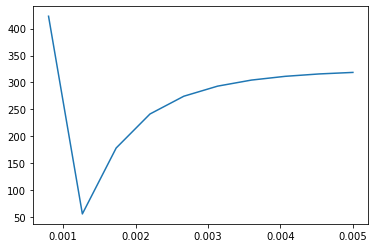

In [18]:
plt.plot(betavalues, function_values)

In [19]:
function_values

array([422.95520907,  55.84959216, 178.28440025, 241.43627652,
       274.423983  , 293.16377328, 304.408789  , 311.3799422 ,
       315.79550056, 318.6412381 ])

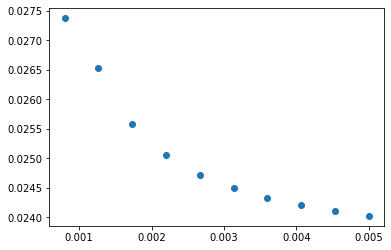

In [20]:
plt.scatter(beta_val, alpha_val)

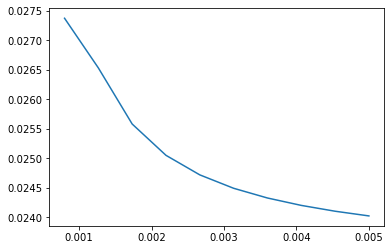

In [21]:
plt.plot(betavalues, alpha_val)